In [73]:
import numpy  as np
from sklearn.datasets import make_regression as make_regrassion
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


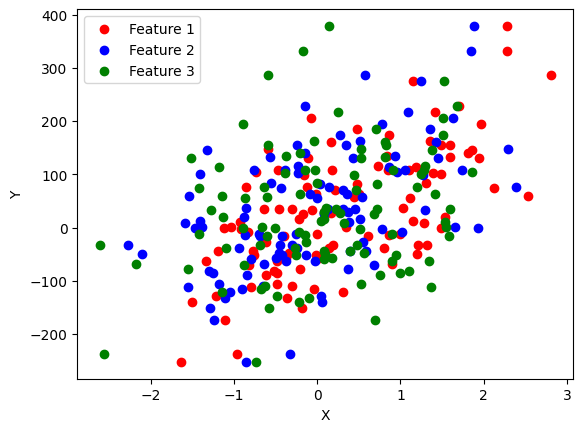

In [74]:
x, y = make_regrassion(n_samples=100, n_features=3, noise=10)
plt.scatter(x[:, 0], y, color="red", label="Feature 1")
plt.scatter(x[:, 1], y, color="blue", label="Feature 2")
plt.scatter(x[:, 2], y, color="green", label="Feature 3")

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


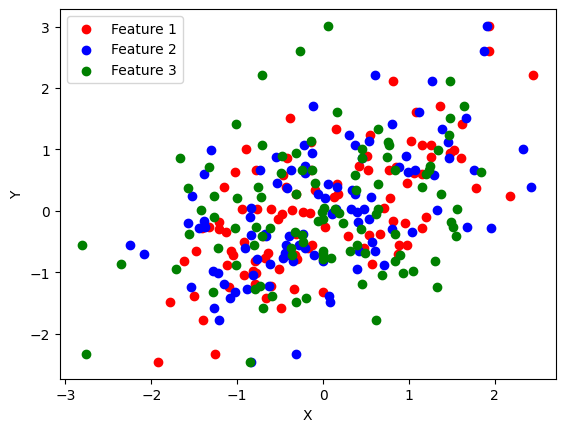

In [75]:

y = (y-y.mean())/y.std()
x = (x-x.mean(axis=0))/x.std(axis=0)
plt.scatter(x[:, 0], y, color="red", label="Feature 1")
plt.scatter(x[:, 1], y, color="blue", label="Feature 2")
plt.scatter(x[:, 2], y, color="green", label="Feature 3")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [77]:
import numpy as np
import matplotlib.pyplot as plt


def h(x, theta):
    return np.dot(x, theta)


def error(x, y, theta):
    ybar = h(x, theta)
    return np.mean((y - ybar) ** 2)

# Gradient function
def gradient(x, y, theta):
    ybar = h(x, theta)
    grad = np.dot(x.T, (ybar - y))
    m = x.shape[0]
    return grad / m


def train(x, y, learning_rate=0.1, max_iter=100):

    x = np.c_[np.ones(x.shape[0]), x]

    n = x.shape[1]
    theta = np.zeros(n)
    errorList = []

    for i in range(max_iter):
        e = error(x, y, theta)
        grad = gradient(x, y, theta)
        theta = theta - learning_rate * grad
        errorList.append(e)

    plt.plot(errorList)
    plt.xlabel('Iterations')
    plt.ylabel('Mean Squared Error')
    plt.title('Error vs Iterations')
    plt.show()

    return theta


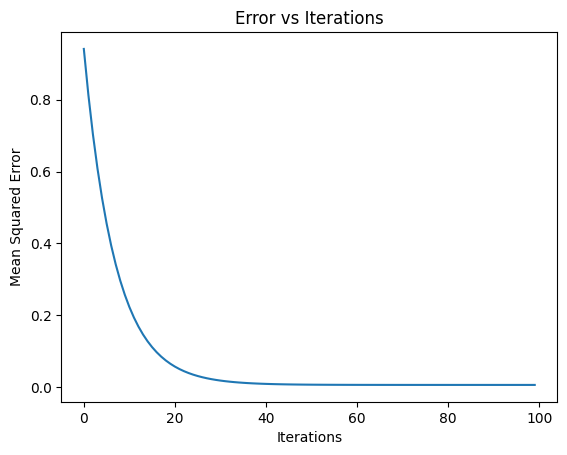

array([0.01426682, 0.83450201, 0.67747047, 0.41487572])

In [78]:
theta  = train(x_train,y_train)
theta


In [79]:
def predic(x,theta):
    x = np.c_[np.ones(x.shape[0]), x]
    return h(x,theta)

y_pred = predic(x_test,theta)
y_pred

array([ 1.02826186,  0.04049377,  0.96842545,  1.00063544, -0.79653068,
        0.65626751, -1.21221149,  2.17073443,  2.78172574,  1.74292194,
       -0.31245248,  0.77646141, -1.1000977 , -0.85790569, -0.21136394,
       -1.35405662, -0.61687487,  0.5639595 ,  0.20449991,  0.5746659 ])

In [80]:

def r2score(y,y_pred):
  ymean = y.mean()
  allnum = np.sum((y-y_pred)**2)
  allden = np.sum((y-ymean)**2)
  return 1-(allnum/allden)

print(str(int(r2score(y_test,y_pred)*100))+"%")

99%
